## Cellular Automata
**FIZ371 - Scientific & Technical Computations | 12/05/2020**

**Game of Life & Cellular Automata**
* Introduction
* The Rules
* Applications
* Characteristics
* Implementation
  * 1-Dimensional
    * The Rule
  * 2-Dimensional
* Classification of Systems
* References & Links
  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Introduction

Towards the end of the 60s, mathematician John H. Conway, after careful considerations, devised a set of simple rules that could mimic complex behaviour depending on the starting conditions. It was made famous after being reported by Martin Gardner on Scientific American (1970) and influenced many people from Richard Feynman to -and especially- Stephen Wolfram.

# The Rules
The rules of the game is simple enough: You start with a graph paper, grid page and fill in some of the boxes as you see fit. This is your starting state. Then for each one of the boxes, depending on the state of its surrounding neighbours (the 4 principal directions for the [von Neumann neighbourhood](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood) and that plus the diagonals for the more commonly used [Moore neighbourhood](https://en.wikipedia.org/wiki/Moore_neighborhood)).

Considering the Moore neighbourhood:
1. a "living" (meaning _filled_) box dies if it has less than 2 or more than 3 living neighbours
2. a box becomes "alive" if it has exactly 3 living neighbours.

This rule set is summarized as "B3/S23" (as in: "Born @ 3 / Survives @ 2 or 3").

# Applications
There are many implementations of these rules. Most succesful among them being:
1. https://copy.sh/life/
2. http://pmav.eu/stuff/javascript-game-of-life-v3.1.1/

[A dedicated wiki](https://www.conwaylife.com/wiki/Main_Page) about almost anything related to the "Game of Life" is also available via the https://www.conwaylife.com/ site. For instance, some examples of specific behaviour clusters are:
1. [Still Lives](http://www.conwaylife.com/wiki/List_of_common_still_lives)
2. [Oscillators](http://www.conwaylife.com/wiki/List_of_common_oscillators)
3. [Space Ships](http://www.conwaylife.com/wiki/List_of_spaceships)

# Characteristics
It has been proven that "Game of Life" system is Turing complete (meaning that, it can be programmed to construct itself and/or variants _(or anything)_), i.e., a universal machine. Stephen Wolfram has played a huge role in the said proof [*](https://mathworld.wolfram.com/GameofLife.html). 

Wolfram believed -and still believes- that our universe can be understood as a similar automaton, obeying a set of simple rules like those of the Game of Life. Very recently (a month ago of this writing: April 14th, 2020), [he announced that he had achieved kind of a breakthrough in his quest to explain the physical laws via automatons(https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/)]. Coincidentally, his announcement took place just 3 days after [John Conway passed away on the 11th](https://www.dailyprincetonian.com/article/2020/04/john-conway-dead-covid-19), at the age of 82 due to Covid 19 related issues.

# Implementation
Game of Life has many different variations with respect to its set of rules and/or dimensions but the standard is B3/S23 on a 2D square grid, using the Moore neighbourhood. There are many implementations available on the web, but to understand the process we will start by implementing a 1D version so that we can also understand the classifications with respect to the specified rules, and then will move on to the standard, 2D version.

## 1-Dimensional
When you are living in a 1D universe, you'll have 2 immediate neighbours: one to your left and the other to your right, so at any time, we will be focusing (doing calculations) on 3 consecutive boxes. As each of the boxes can be in one of the 2 states (being 'dead' or 'alive'), there are a total of 8 possible outcomes:

In [1]:
import numpy as np
for state in range(8):
    state_2 = np.base_repr(state,base=2)
    print("{:d}\t{:0>3s}\t{:s}".format(state,state_2,
       "{:0>3s}".format(state_2).replace("0","◻").replace("1","◼")))
    #world_t_str = ''.join(world[0,:].astype(str))
#world_t_str_symb = world_t_str.replace("0","◻").replace("1","◼")

0	000	◻◻◻
1	001	◻◻◼
2	010	◻◼◻
3	011	◻◼◼
4	100	◼◻◻
5	101	◼◻◼
6	110	◼◼◻
7	111	◼◼◼


### The Rule
The rule defines what happens to the cell in the middle at the next turn -- it can:
1. Keep on being what it was (dead -> dead | alive -> alive)
2. Go to the opposite state (dead -> alive | alive -> dead)
3. Die ({dead, alive} -> dead)
4. Become alive ({dead,alive} -> alive)

Let's impose a set of rules of our own - it should cover all of the 8 possible states, so let it be something like:

state|binary|representation|$\rightarrow$|outcome|representation
---|---|---|---|---|---
7|111|◼◼◼ |$\rightarrow$|0|◻
6|110|◼◼◻ |$\rightarrow$|1|◼
5|101|◼◻◼ |$\rightarrow$|0|◻
4|100|◼◻◻ |$\rightarrow$|1|◼
3|011|◻◼◼ |$\rightarrow$|1|◼
2|010|◻◼◻ |$\rightarrow$|0|◻
1|001|◻◻◼ |$\rightarrow$|1|◼
0|000|◻◻◻ |$\rightarrow$|0|◻

By ordering this rule like this, from 111 to 000, we write the corresponding outcomes side by side, i.e., "01011010", then for practicality and mnemonic reasons, we treat this set of outcomes as if it is a binary number and convert it to the decimal system:

In [2]:
int("01011010",2)

90

thus, our rule as specified above is referred as "[rule 90](https://www.wolframalpha.com/input/?i=rule+90)". Let's see this rule at work, for a random starting configuration:

In [3]:
"""
/* Emre S. Tasci <emre.tasci@hacettepe.edu.tr>          *
*
* Filename: game_of_life_1D.m
*
* 1D Game of Life implementation.
*
* Saves the states in "aux_aux_world.txt" (as a matrix) and
* "aux_timeline.txt" (as visuals).
*
Rule #90, World Size: 40

Initial state:
0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0

000001	◼◼◼◼◼◻◻◼◻◼◻◼◻◼◼◼◻◻◼◻◻◻◼◼◻◼◻◻◻◻◼◼◻◼◻◼◻◼◼◼
000002	◼◼◼◼◻◻◻◼◼◼◼◼◼◻◼◻◻◻◼◻◼◻◻◻◼◼◻◼◼◻◻◻◼◼◼◼◼◻◼◼
000003	◼◼◼◻◻◼◻◻◼◼◼◼◻◼◼◻◼◻◼◼◼◻◼◻◻◻◼◻◻◻◼◻◻◼◼◼◻◼◻◼
000004	◼◼◻◻◻◼◻◻◻◼◼◻◼◻◻◼◼◼◻◼◻◼◼◻◼◻◼◻◼◻◼◻◻◻◼◻◼◼◼◻
000005	◻◻◻◼◻◼◻◼◻◻◻◼◼◻◻◻◼◻◼◼◼◻◻◼◼◼◼◼◼◼◼◻◼◻◼◼◻◼◻◼
000006	◻◼◻◼◼◼◼◼◻◼◻◻◻◻◼◻◼◼◻◼◻◻◻◻◼◼◼◼◼◼◻◼◼◼◻◻◼◼◼◼
000007	◼◼◼◻◼◼◼◻◼◼◻◼◼◻◼◼◻◻◼◼◻◼◼◻◻◼◼◼◼◻◼◻◼◻◻◻◻◼◼◻
000008	◻◼◻◼◻◼◻◼◻◻◼◻◻◼◻◻◻◻◻◻◼◻◻◻◻◻◼◼◻◼◼◼◼◻◼◼◻◻◻◼
000009	◼◼◼◼◼◼◼◼◻◻◼◻◻◼◻◼◼◼◼◻◼◻◼◼◼◻◻◻◼◻◼◼◻◼◻◻◻◼◻◼
000010	◼◼◼◼◼◼◼◻◻◻◼◻◻◼◼◻◼◼◻◼◼◼◻◼◻◻◼◻◼◼◻◻◼◼◻◼◻◼◼◻

*                                             09/12/18 */
"""
import numpy as np

world_size = 40
num_of_time_steps = 50
k = 3

# Create the world as a num_of_time_steps x world_size size matrix:
world = np.zeros([num_of_time_steps,world_size]);

def modd(n):
    return np.mod(n,world_size)
def bin2dec(bin):
    return int(bin,2)
def dec2bin(dec):
    return np.base_repr(dec,base=2)


# Define the rules:
rules = [None]*8;
rules[0] = 0; # 000 => 0
rules[1] = 1; # 001 => 1
rules[2] = 0; # 010 => 0
rules[3] = 1; # 011 => 1
rules[4] = 1; # 100 => 1
rules[5] = 0; # 101 => 0
rules[6] = 1; # 110 => 1
rules[7] = 0; # 111 => 0

world = np.zeros([num_of_time_steps,world_size],int)
#print(world.shape)

file_id = open("aux_timeline_py.txt","w")
#file_id.write("Rule #%d, World Size: %d\n\n",bin2dec(strrep(num2str(rules)," ","")),world_size)
rule = ''.join(map(str,rules))
file_id.write("Rule #%d, World Size: %d\n\n"%(bin2dec(rule),world_size))

# Define the initial state:
# Randomly fill with 0 & 1 of a 1 row, world_size cols sized matrix
world[0,:] = np.random.randint(0,2,(1,world_size))
file_id.write("Initial state:\n%s\n\n"%(' '.join(world[0,:].astype(str))))
world_t_str = ''.join(world[0,:].astype(str))
world_t_str_symb = world_t_str.replace("1","◻").replace("0","◼")
print("%06d\t%s\n"%(1,world_t_str_symb),end="")
file_id.write("%06d\t%s\n"%(1,world_t_str_symb))

for t in range(1,num_of_time_steps):
    for n in range(0,world_size):
        previous_t_left_neighbor_state= world[t-1,np.mod(n-1,world_size)].astype(str)
        previous_t_self_neighbor_state= world[t-1,np.mod(n,world_size)].astype(str)
        previous_t_right_neighbor_state= world[t-1,np.mod(n+1,world_size)].astype(str)
        previous_t_triple_state = previous_t_left_neighbor_state+previous_t_self_neighbor_state+previous_t_right_neighbor_state
        #print("%3d\t%3d\t%3s" % (t,n,previous_t_triple_state))
        rule = rules[bin2dec(previous_t_triple_state)];
        world[t,n] = rule;
    world_t_str = ''.join(world[t,:].astype(str))
    world_t_str_symb = world_t_str.replace("1","◻").replace("0","◼")
    print("%06d\t%s\n"%((t+1),world_t_str_symb),end="")
    file_id.write("%06d\t%s\n"%((t+1),world_t_str_symb))
    #printf(figure_form);

#print(world)
file_id.close()

np.savetxt("aux_world_py.txt",world,"%d")

000001	◼◻◻◻◼◻◻◻◻◻◼◻◻◼◻◼◼◼◼◼◻◻◻◼◻◼◼◼◻◻◼◻◻◻◼◼◼◻◼◼
000002	◻◻◼◻◼◻◼◼◼◻◼◻◻◼◼◻◼◼◼◻◻◼◻◼◼◻◼◻◻◻◼◻◼◻◻◼◻◼◻◼
000003	◻◻◼◼◼◼◻◼◻◼◼◻◻◻◻◼◻◼◻◻◻◼◼◻◻◼◼◻◼◻◼◼◼◻◻◼◼◼◼◼
000004	◻◻◻◼◼◻◼◼◼◻◻◻◼◼◻◼◼◼◻◼◻◻◻◻◻◻◻◼◼◼◻◼◻◻◻◻◼◼◼◻
000005	◼◼◻◻◻◼◻◼◻◻◼◻◻◻◼◻◼◻◼◼◻◼◼◼◼◼◻◻◼◻◼◼◻◼◼◻◻◼◻◻
000006	◻◻◻◼◻◼◼◼◻◻◼◻◼◻◼◼◼◼◻◻◼◻◼◼◼◻◻◻◼◼◻◻◼◻◻◻◻◼◻◻
000007	◼◼◻◼◼◻◼◻◻◻◼◼◼◼◻◼◼◻◻◻◼◼◻◼◻◻◼◻◻◻◻◻◼◻◼◼◻◼◻◼
000008	◼◻◼◻◻◼◼◻◼◻◻◼◼◻◼◻◻◻◼◻◻◻◼◼◻◻◼◻◼◼◼◻◼◼◻◻◼◼◼◻
000009	◼◼◼◻◻◻◻◼◼◻◻◻◻◼◼◻◼◻◼◻◼◻◻◻◻◻◼◼◻◼◻◼◻◻◻◻◻◼◻◼
000010	◼◼◻◻◼◼◻◻◻◻◼◼◻◻◻◼◼◼◼◼◼◻◼◼◼◻◻◻◼◼◼◼◻◼◼◼◻◼◼◻
000011	◻◻◻◻◻◻◻◼◼◻◻◻◻◼◻◻◼◼◼◼◻◼◻◼◻◻◼◻◻◼◼◻◼◻◼◻◼◻◻◼
000012	◻◼◼◼◼◼◻◻◻◻◼◼◻◼◻◻◻◼◼◻◼◼◼◼◻◻◼◻◻◻◻◼◼◼◼◼◼◻◻◼
000013	◼◻◼◼◼◻◻◼◼◻◻◻◼◼◻◼◻◻◻◼◻◼◼◻◻◻◼◻◼◼◻◻◼◼◼◼◻◻◻◼
000014	◻◼◻◼◻◻◻◻◻◻◼◻◻◻◼◼◻◼◻◼◼◻◻◻◼◻◼◼◻◻◻◻◻◼◼◻◻◼◻◻
000015	◻◼◼◼◻◼◼◼◼◻◼◻◼◻◻◻◼◼◼◻◻◻◼◻◼◼◻◻◻◼◼◼◻◻◻◻◻◼◻◼
000016	◼◻◼◻◼◻◼◼◻◼◼◼◼◻◼◻◻◼◻◻◼◻◼◼◻◻◻◼◻◻◼◻◻◼◼◼◻◼◼◼
000017	◻◼◼◼◼◼◻◻◼◻◼◼◻◼◼◻◻◼◻◻◼◼◻◻◻◼◻◼◻◻◼◻◻◻◼◻◼◻◼◼
000018	◼◻◼◼◼◻◻◻◼◼◻◻◼◻◻◻◻◼◻◻◻◻◻◼◻◼◼◼◻◻◼◻◼◻◼◼◼◼◻◻
000019	◼◼◻◼◻◻◼◻◻◻◻◻◼◻◼◼◻◼◻◼◼◼◻◼◼◻◼◻◻◻◼◼◼◼◻◼◼◻◻◻
000020	◻◻◼◼◻◻◼◻◼◼◼◻◼◼◻◻◼◼◼◻◼◻◼◻◻◼◼◻◼◻◻◼◼◻◼◻◻◻◼◻
000021	◼◻◻◻◻◻◼◼◻◼◻◼◻◻◻◻◻◼◻◼◼◼◼◻◻◻◻◼◼◻◻◻◻

## 2-Dimensional

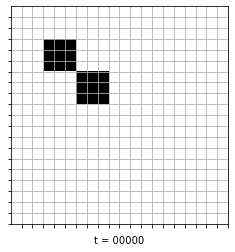

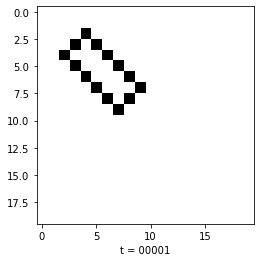

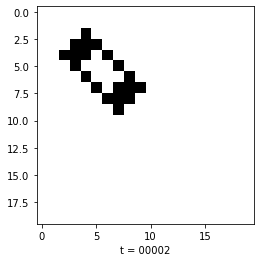

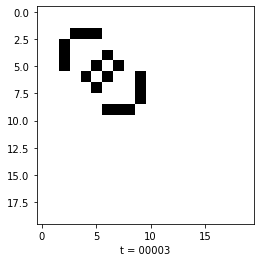

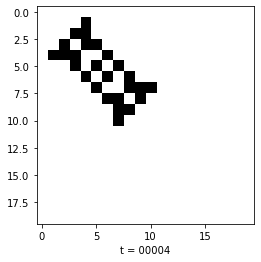

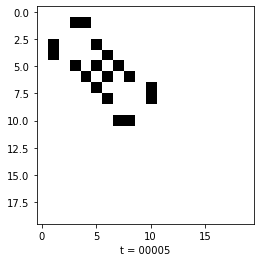

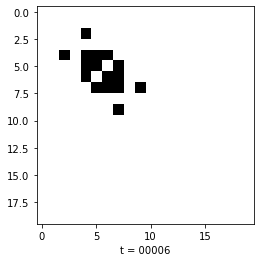

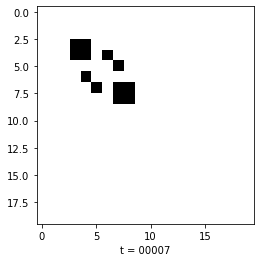

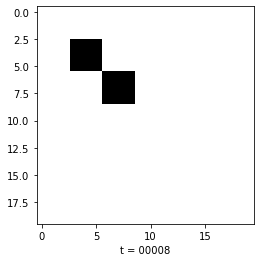

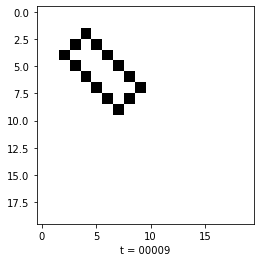

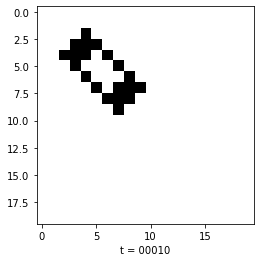

In [4]:
"""
/* Emre S. Tasci <emre.tasci@hacettepe.edu.tr>          *
*
* Filename: game_of_life_2D.m
*
* 2D Game of Life implementation.
*                                             09/12/18 */
"""
import numpy as np
from matplotlib import pyplot as plt

world_size = {"x":0,"y":0}
world_size["x"] = 20
world_size["y"] = 20

num_time_steps = 10;
#np.arccos()
def modd_x(n):
    return np.mod(n,world_size["x"])

def modd_y(n):
    return np.mod(n,world_size["y"])

def show_matrix(world,fig,t=0,pause_time=0.5):
    #fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0.5, world_size["x"] ,1)
    minor_ticks = np.arange(0.5, world_size["x"], 1)

    ax.set_xticks(major_ticks)
    #ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    #ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    #ax.grid(which='minor', alpha=1)
    ax.grid(which='major', alpha=1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(world,cmap='Greys')
    plt.draw()
    plt.xlabel("t = %05d"%t)
    #plt.show()
    plt.pause(pause_time)
    #input("...")
    plt.clf()


# Random
world = np.random.randint(0,2,[world_size["y"], world_size["x"]])

# Glider Spaceship (http://www.conwaylife.com/wiki/Glider)
world = np.zeros([world_size["y"], world_size["x"]])
world[1,2] = world[2,3] = world[3,1:4] = 1

# Ligthweight Spaceship (http://www.conwaylife.com/wiki/Lightweight_spaceship
world = np.zeros([world_size["y"], world_size["x"]])
world[1,2] = world[1,5] = world[2,1] = world[3,1] = world[3,5] = world[4,1:5] = 1

# Figure eight (http://www.conwaylife.com/wiki/Figure_eight)
world = np.zeros([world_size["y"], world_size["x"]])
world[3:6,3:6] = world[6:9,6:9] = 1

fig = plt.figure()
show_matrix(world,fig)

aux = world.copy()
#print(world)
#print(world.shape)
for t in range(0,num_time_steps):
    for row in range(0,world_size["y"]):
        for col in range(0,world_size["x"]):
            # Count the neighbours
            neighbours = []
            #print("(%2d,%2d):\t"%(row,col),end="")
            for i in range(-1,2):
                for j in range(-1,2):
                    #if(i == j == 0):
                    #    continue
                    #print("(%d,%d) "%(modd_y(row+j),modd_x(col+i)),end="")
                    neighbours.append(world[modd_y(row+i),modd_x(col+j)])

            #print("")
            #print(neighbours)
            count_neighbours = sum(neighbours) - world[row,col] # Don't count itself as neighbor
            if(count_neighbours == 3):
                aux[row,col] = 1
            elif(count_neighbours == 2):
                aux[row,col] = world[row,col]
            else:
                aux[row,col] = 0
    world = aux.copy()
    #print(world)
    show_matrix(world,fig,t+1,pause_time=0.1)
plt.close()

# Classification of Systems
[According to the Stephen Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/), a celular automata can be classified into one of the following 4 systems:
1. Almost all initial conditions lead to exactly the same uniform final state.
2. The final state becomes a repetition.
3. The evolution seems complicated alas a pattern-like behaviour (such as triangles) emerges.
4. Clusters interact with each other to evolve into even complex and evergoing systems.

It is this 4th class that is promising.

![cellular_automata_classification_Wolfram.png](images/cellular_automata_classification_Wolfram.png)
Stephen Wolfram, "A New Kind of Science: Four Classes of Behavior: Image Source for Page 231" from the Notebook Archive (2018), https://notebookarchive.org/2018-12-1g671ci

# References & Links:
## Articles
* [Martin Gardner, “Mathematical Games: The fantastic combinations of John Conway's new solitaire game ‘life’”, Scientific American 223 120 (1970)](http://dx.doi.org/10.1038)
* [Dierk Schleicher, “Interview with John Horton Conway”, Notices of the American Mathematical Society 60 567 (2013)](https://www.ams.org/notices/201305/rnoti-p567.pdf)
* [Stephen Wolfram, "A New Kind of Science"](https://www.wolframscience.com/nks/)
* [Mark Andrew Smith, "Cellular Automata Methods in Mathematical Physics", Ph.D. Thesis, MIT (1994)](https://dl.acm.org/doi/pdf/10.5555/888548)
* [A.I. Adamatzky, "Computation of Shortest Path in Cellular Automata", Mathl. Comput. Modelling (23) 105 (1996)](https://doi.org/10.1016/0895-7177(96)00006-4)
## Videos
* [Civilization III Summary replay](https://www.youtube.com/watch?v=V7SKQAw7Txw)
* [Programmable self-assembly in a thousand-robot swarm](https://www.youtube.com/watch?v=xK54Bu9HFRw)
* [World War II in Europe: Every Day](https://www.youtube.com/watch?v=WOVEy1tC7nk)
## Implementations
* https://copy.sh/life/ (Detailed & complex)
* http://pmav.eu/stuff/javascript-game-of-life-v3.1.1/ (simpler)
* [Digital clock implementation](https://copy.sh/life/?gist=f3413564b1fa9c69f2bad4b0400b8090&step=512)
* [Reaction-Diffusion Simulation using Gray-Scott Model / Karl Sims](http://karlsims.com/rd.html)

* [Game of Life Wiki](http://www.conwaylife.com/wiki/Main_Page)